In [5]:
import pandas as pd
import numpy as np
from math import radians, sin, cos, sqrt, atan2, exp, log1p, expm1
from datetime import timedelta

# Veri dosyalarının adları (siz kendi dosya adlarınızı kullanın)
FILE1_PATH = '../data/1990-2000.csv'
FILE2_PATH = '../data/2000-2025.csv'

def load_and_preprocess_data(file1_path, file2_path):
    """Deprem verisini yükler, birleştirir ve temizler."""
    try:
        df1 = pd.read_csv(file1_path)
        df2 = pd.read_csv(file2_path)
    except FileNotFoundError:
        print(f"HATA: Dosyalar bulunamadı.\nKontrol et: {file1_path}, {file2_path}")
        return None

    # Birleştir
    df = pd.concat([df1, df2], ignore_index=True)

    # Zaman formatını düzelt
    df['time'] = pd.to_datetime(df['time'], errors='coerce')
    df.dropna(subset=['time'], inplace=True)

    # Temel sayısal alanlar (NaN olanları çıkar)
    numeric_cols = ['latitude', 'longitude', 'depth', 'mag']
    df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')
    df.dropna(subset=numeric_cols, inplace=True)

    # İsteğe bağlı: büyüklüğü 2.5 altı olan küçük sarsıntıları çıkar
    df = df[df['mag'] >= 2.0]

    # Diğer alanlarda da temizlik
    df['place'] = df['place'].fillna("Bilinmeyen")

    # İstenmeyen sütunları çıkar (istenirse)
    drop_cols = ['nst', 'gap', 'dmin', 'rms', 'net', 'id', 'updated',
                 'type', 'horizontalError', 'depthError', 'magError', 'magNst',
                 'status', 'locationSource', 'magSource']
    df = df.drop(columns=drop_cols, errors='ignore')

    # Veriyi sırala
    df = df.sort_values(by='time').reset_index(drop=True)

    # Ek sütunlar
    df['year'] = df['time'].dt.year
    df['month'] = df['time'].dt.month
    df['day'] = df['time'].dt.day
    df['hour'] = df['time'].dt.hour

    print(f"✅ Toplam {len(df)} temizlenmiş deprem kaydı yüklendi.")
    print("📌 İlk 3 kayıt:\n", df.head(3))
    print("📆 Veri aralığı:", df['time'].min(), "->", df['time'].max())

    return df

# Veriyi yükle
df_earthquakes = load_and_preprocess_data(FILE1_PATH, FILE2_PATH)

if df_earthquakes is None:
    print("Veri yüklenemediği için işlem durduruluyor.")
    # exit() # Eğer script olarak çalıştırıyorsanız

✅ Toplam 32166 temizlenmiş deprem kaydı yüklendi.
📌 İlk 3 kayıt:
                               time  latitude  longitude  depth  mag magType  \
0 1990-01-01 02:47:41.250000+00:00    36.323     26.969  144.8  3.3      md   
1 1990-01-02 20:35:41.790000+00:00    38.607     24.194   10.0  4.6      mb   
2 1990-01-02 21:46:47.240000+00:00    36.118     27.210    5.0  3.6      md   

                           place  year  month  day  hour  
0  35 km SSW of Mandráki, Greece  1990      1    1     2  
1  7 km ENE of Oxílithos, Greece  1990      1    2    20  
2    55 km S of Mandráki, Greece  1990      1    2    21  
📆 Veri aralığı: 1990-01-01 02:47:41.250000+00:00 -> 2025-05-22 03:19:35.341000+00:00


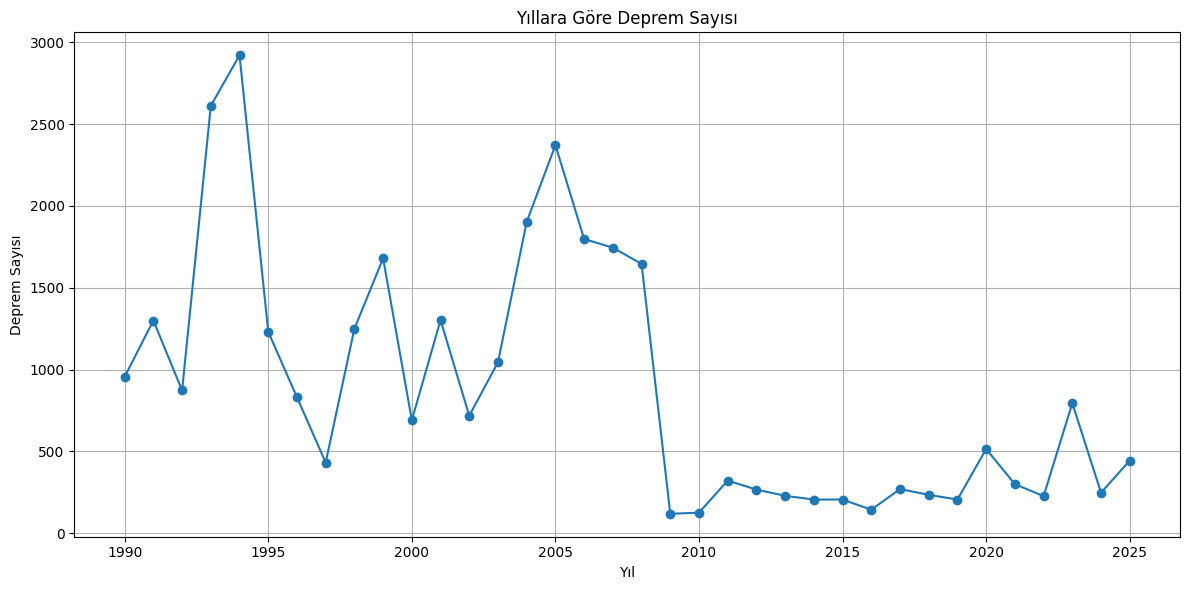

In [6]:
import matplotlib.pyplot as plt

df_earthquakes['year'] = df_earthquakes['time'].dt.year
yearly_counts = df_earthquakes.groupby('year').size()

plt.figure(figsize=(12, 6))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o')
plt.title('Yıllara Göre Deprem Sayısı')
plt.xlabel('Yıl')
plt.ylabel('Deprem Sayısı')
plt.grid(True)
plt.tight_layout()
plt.show()

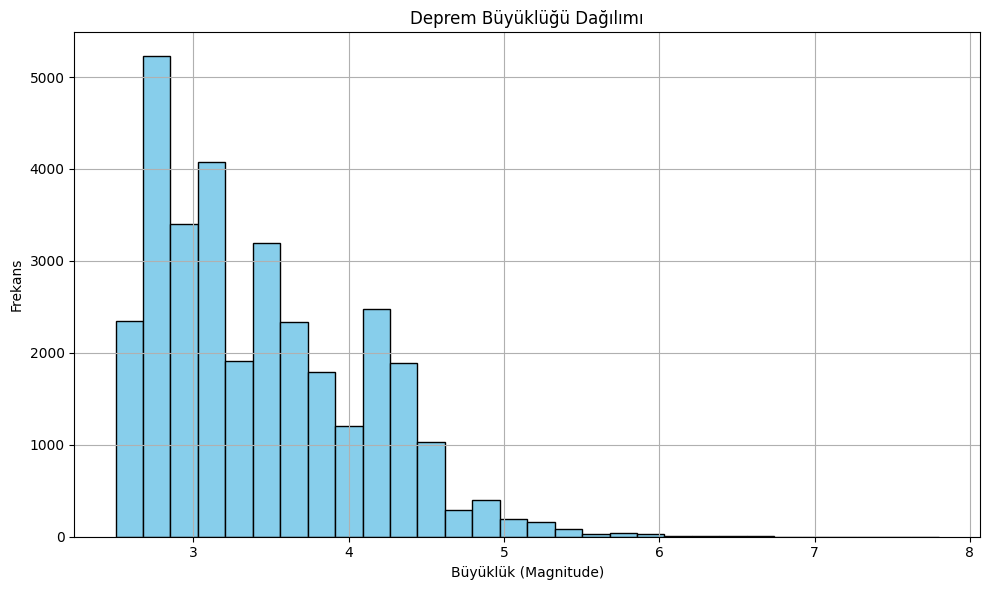

In [7]:
plt.figure(figsize=(10, 6))
plt.hist(df_earthquakes['mag'], bins=30, color='skyblue', edgecolor='black')
plt.title('Deprem Büyüklüğü Dağılımı')
plt.xlabel('Büyüklük (Magnitude)')
plt.ylabel('Frekans')
plt.grid(True)
plt.tight_layout()
plt.show()


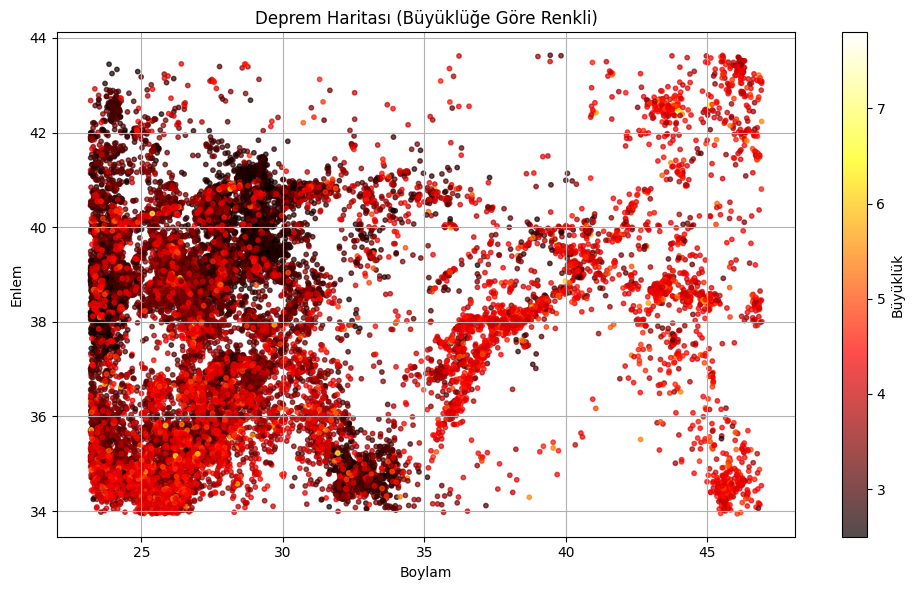

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(df_earthquakes['longitude'], df_earthquakes['latitude'],
            c=df_earthquakes['mag'], cmap='hot', alpha=0.7, s=10)
plt.title('Deprem Haritası (Büyüklüğe Göre Renkli)')
plt.xlabel('Boylam')
plt.ylabel('Enlem')
plt.colorbar(label='Büyüklük')
plt.grid(True)
plt.tight_layout()
plt.show()

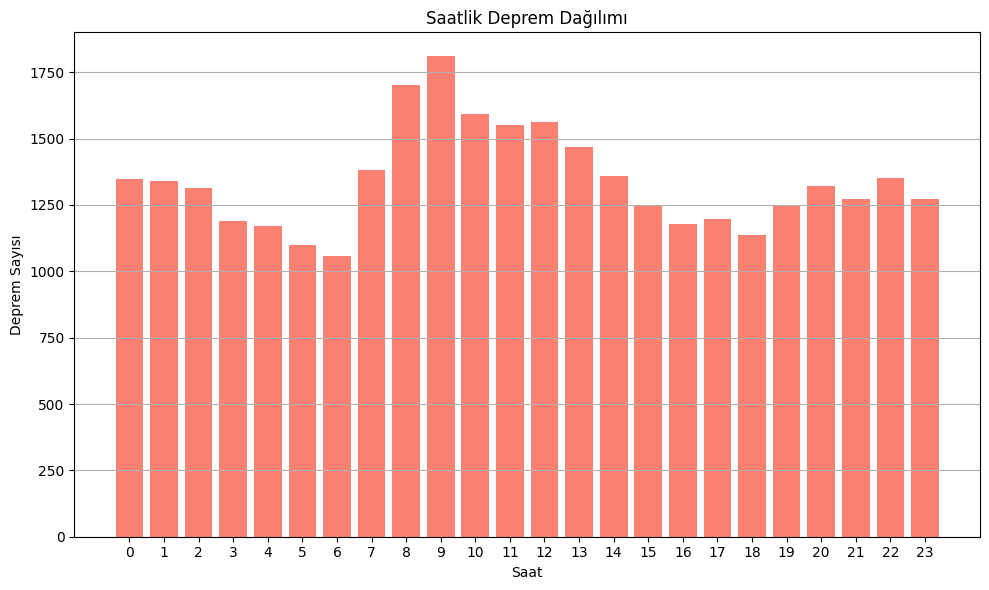

In [9]:
df_earthquakes['hour'] = df_earthquakes['time'].dt.hour
hourly_counts = df_earthquakes.groupby('hour').size()

plt.figure(figsize=(10, 6))
plt.bar(hourly_counts.index, hourly_counts.values, color='salmon')
plt.title('Saatlik Deprem Dağılımı')
plt.xlabel('Saat')
plt.ylabel('Deprem Sayısı')
plt.xticks(range(0, 24))
plt.grid(axis='y')
plt.tight_layout()
plt.show()


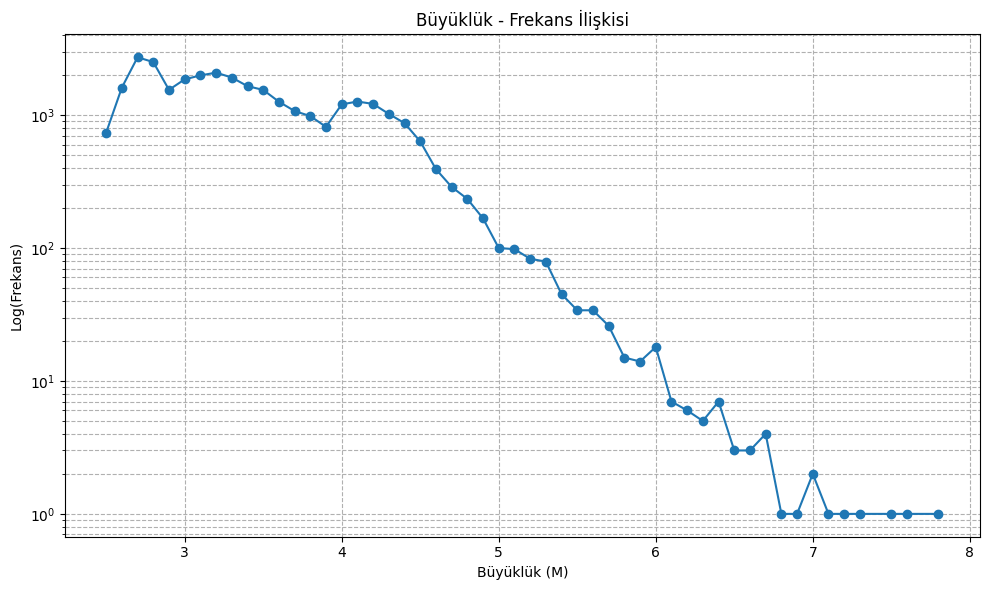

In [11]:
mag_counts = df_earthquakes['mag'].round(1).value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.plot(mag_counts.index, mag_counts.values, marker='o')
plt.yscale('log')  # Log ölçek: Gutenberg-Richter kanunu
plt.title('Büyüklük - Frekans İlişkisi')
plt.xlabel('Büyüklük (M)')
plt.ylabel('Log(Frekans)')
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()

C:\Users\Serhat\AppData\Local\Temp\ipykernel_1620\357408072.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aftershocks["days_after"] = (aftershocks["time"] - center_time).dt.days


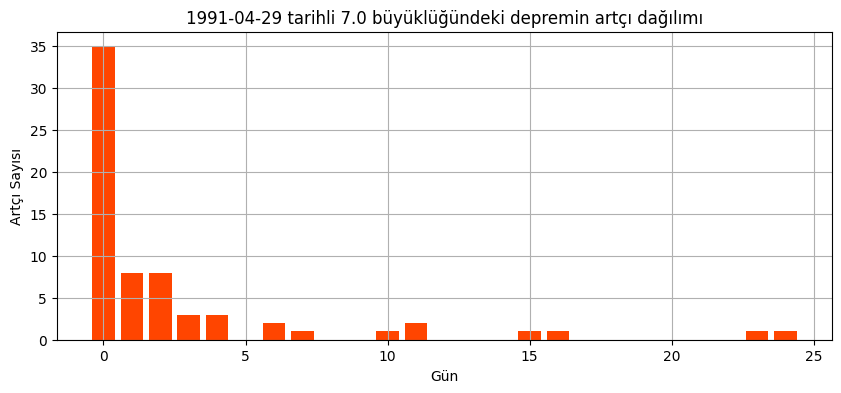

C:\Users\Serhat\AppData\Local\Temp\ipykernel_1620\357408072.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aftershocks["days_after"] = (aftershocks["time"] - center_time).dt.days


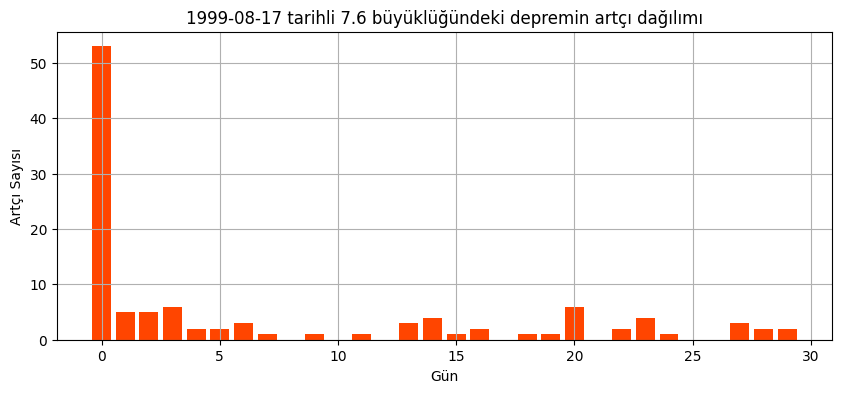

C:\Users\Serhat\AppData\Local\Temp\ipykernel_1620\357408072.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aftershocks["days_after"] = (aftershocks["time"] - center_time).dt.days


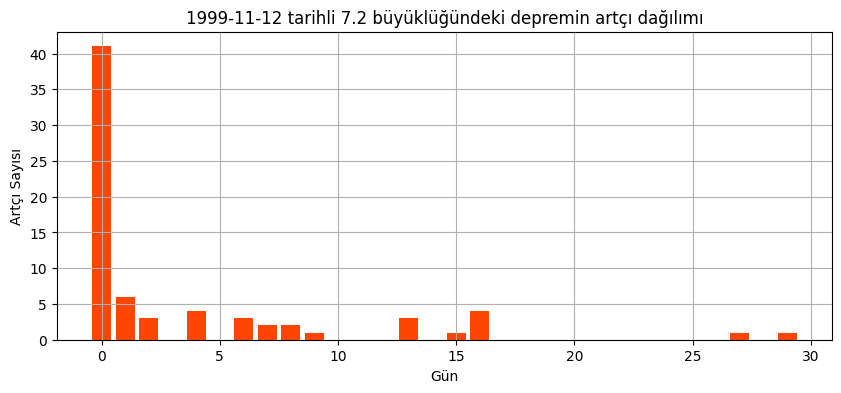

C:\Users\Serhat\AppData\Local\Temp\ipykernel_1620\357408072.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aftershocks["days_after"] = (aftershocks["time"] - center_time).dt.days


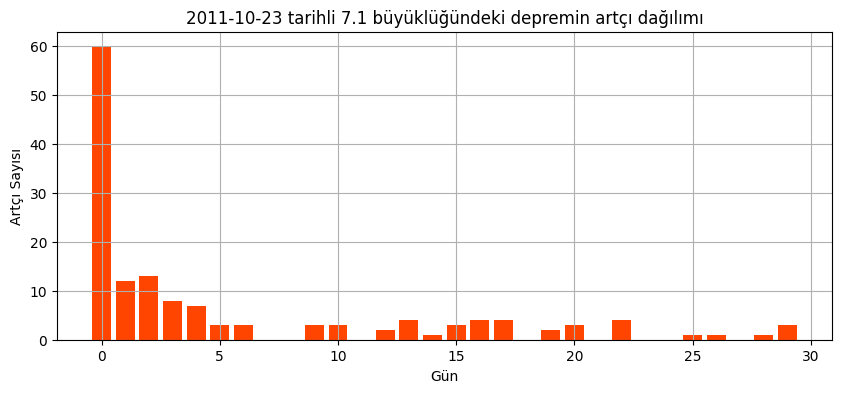

C:\Users\Serhat\AppData\Local\Temp\ipykernel_1620\357408072.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aftershocks["days_after"] = (aftershocks["time"] - center_time).dt.days


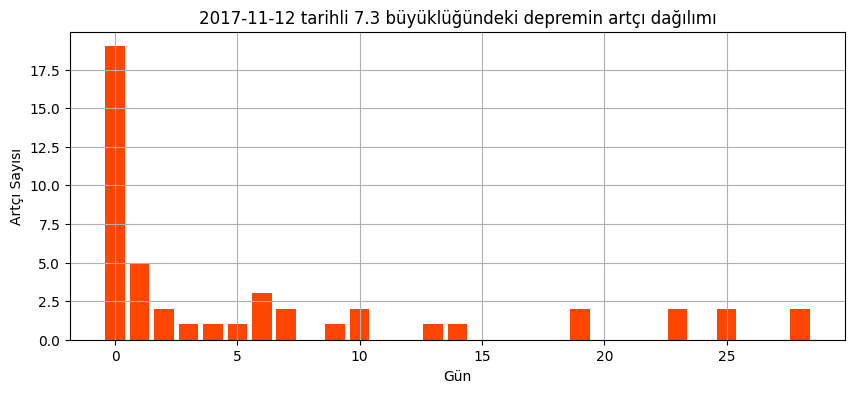

C:\Users\Serhat\AppData\Local\Temp\ipykernel_1620\357408072.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aftershocks["days_after"] = (aftershocks["time"] - center_time).dt.days


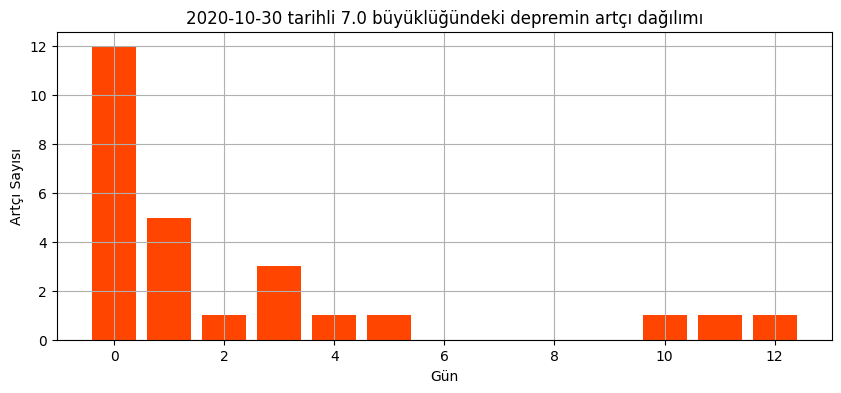

C:\Users\Serhat\AppData\Local\Temp\ipykernel_1620\357408072.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aftershocks["days_after"] = (aftershocks["time"] - center_time).dt.days


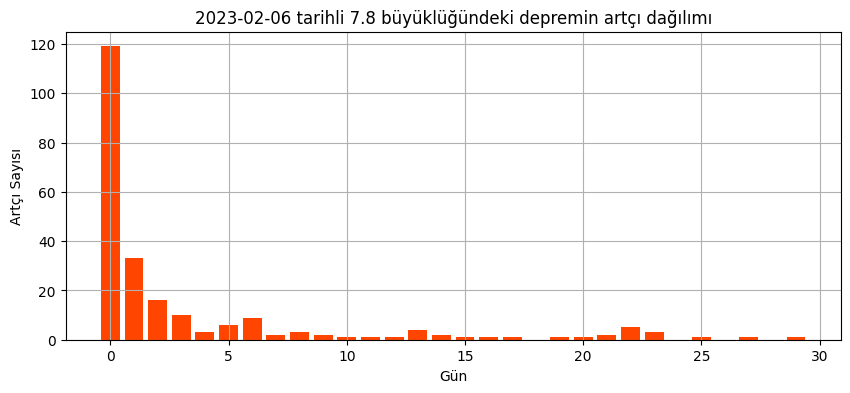

C:\Users\Serhat\AppData\Local\Temp\ipykernel_1620\357408072.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aftershocks["days_after"] = (aftershocks["time"] - center_time).dt.days


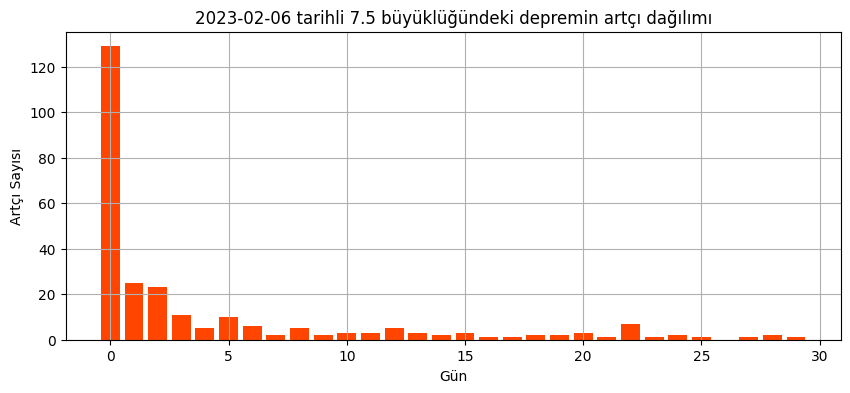

In [17]:
from haversine import haversine


main_quakes = df_earthquakes[df_earthquakes["mag"] >= 7.0]

for i, main_quake in main_quakes.iterrows():
    center_time = main_quake["time"]
    lat, lon = main_quake["latitude"], main_quake["longitude"]

    # Artçıları filtrele: zamansal ve mekânsal olarak yakın olanlar
    time_window = (df_earthquakes["time"] > center_time) & (
        df_earthquakes["time"] <= center_time + timedelta(days=30)
    )
    distance_filter = df_earthquakes.apply(
        lambda row: haversine((lat, lon), (row["latitude"], row["longitude"])) < 100, axis=1
    )
    aftershocks = df_earthquakes[time_window & distance_filter]

    # Günlük histogram
    aftershocks["days_after"] = (aftershocks["time"] - center_time).dt.days
    daily_counts = aftershocks["days_after"].value_counts().sort_index()

    plt.figure(figsize=(10, 4))
    plt.bar(daily_counts.index, daily_counts.values, color="orangered")
    plt.title(
        f"{center_time.date()} tarihli {main_quake['mag']} büyüklüğündeki depremin artçı dağılımı"
    )
    plt.xlabel("Gün")
    plt.ylabel("Artçı Sayısı")
    plt.grid(True)
    plt.show()

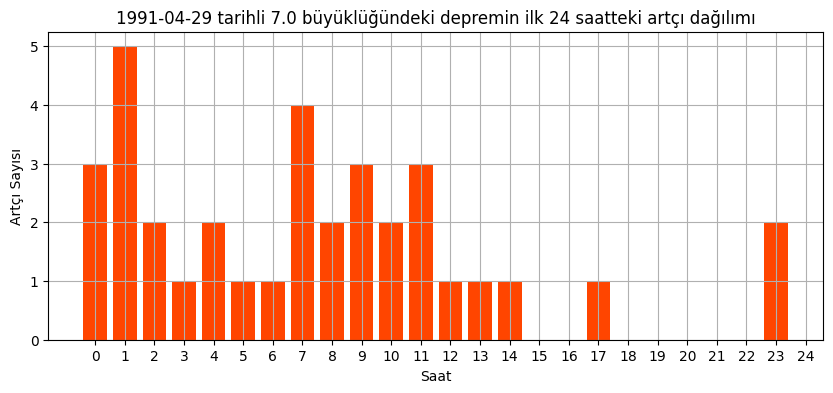

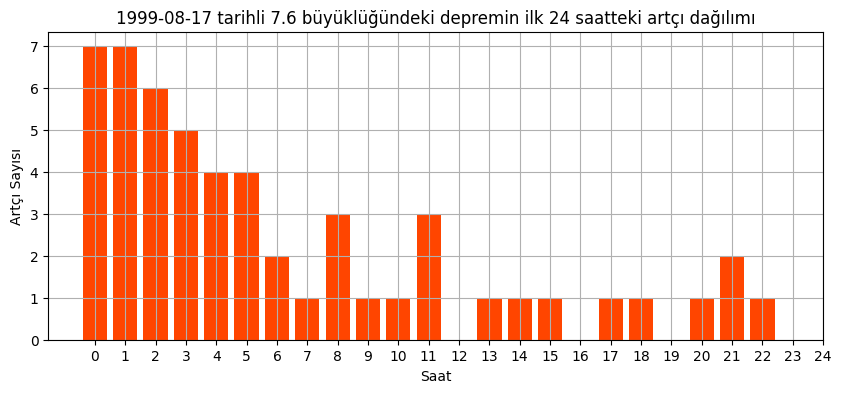

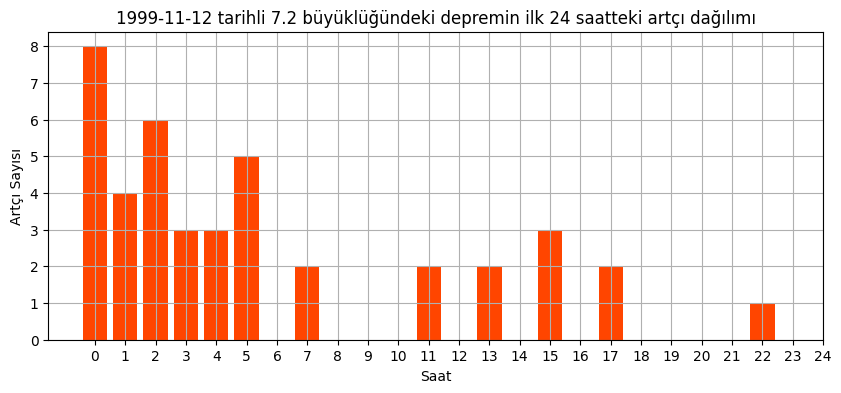

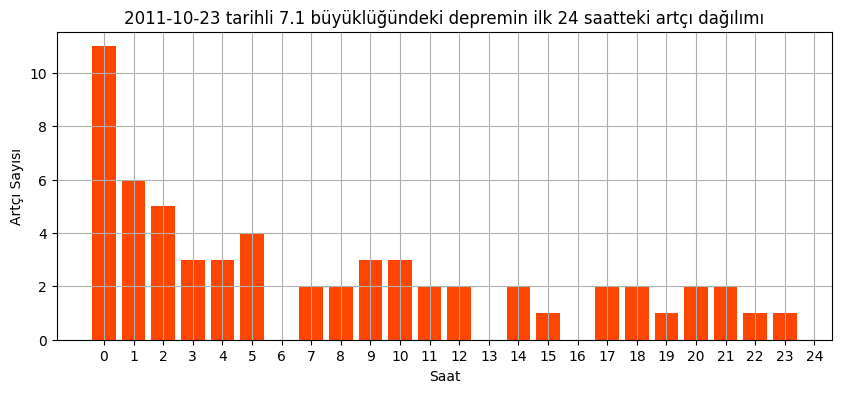

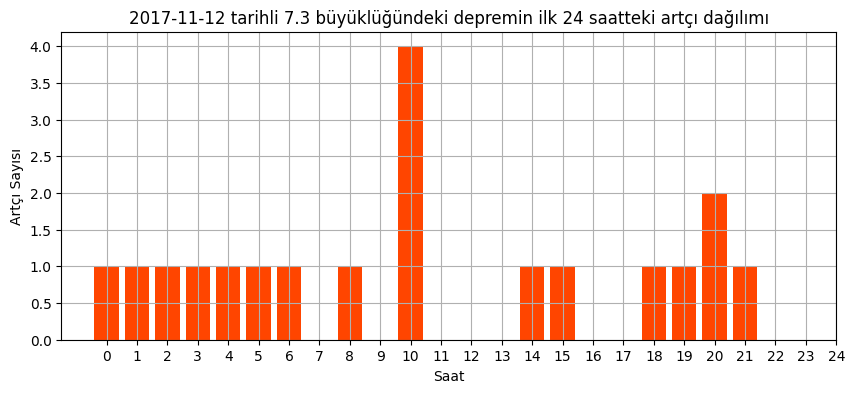

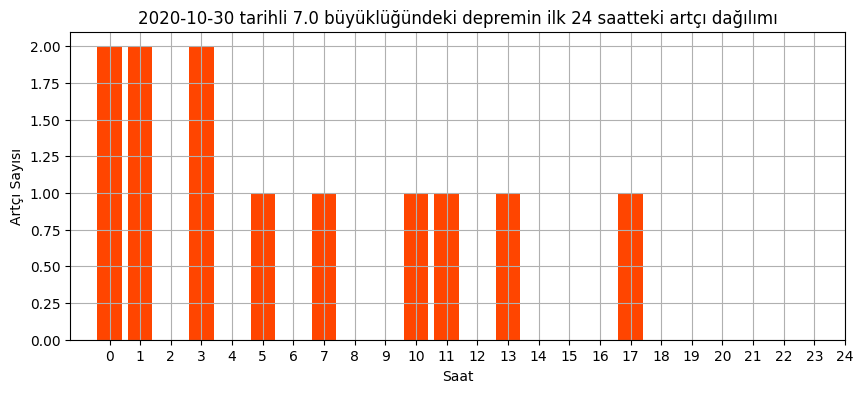

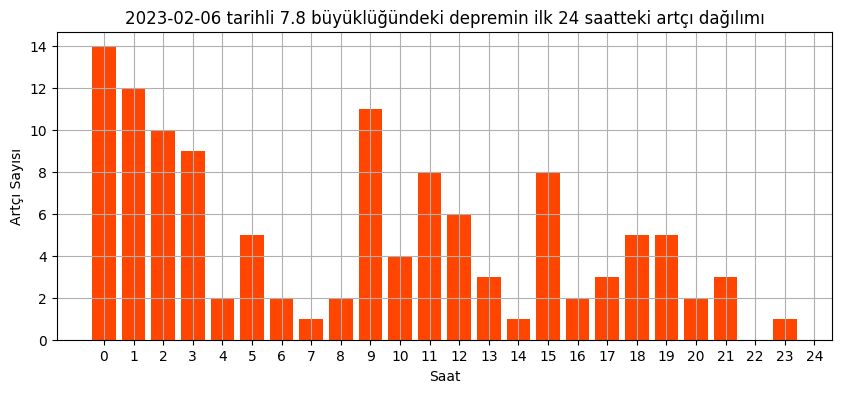

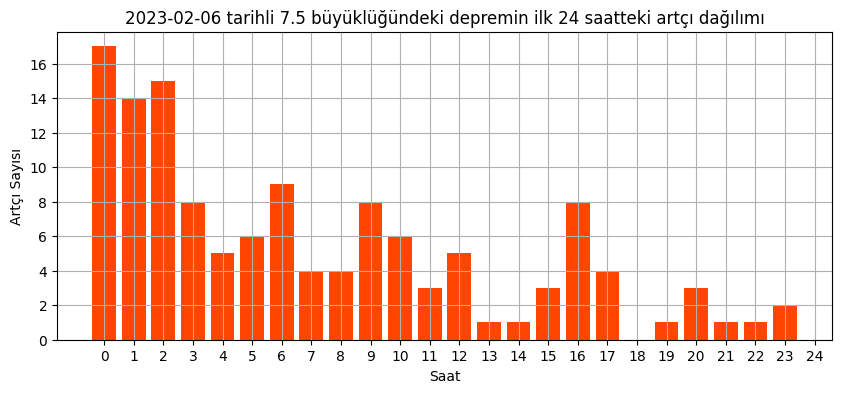

In [25]:
def plot_first_24h_aftershocks(df, threshold=7.0):
    from haversine import haversine
    import matplotlib.pyplot as plt

    main_quakes = df[df["mag"] >= threshold]

    for i, main_quake in main_quakes.iterrows():
        center_time = main_quake["time"]
        lat, lon = main_quake["latitude"], main_quake["longitude"]

        # Sadece ilk 24 saatlik pencere
        time_window = (df["time"] > center_time) & (
            df["time"] <= center_time + pd.Timedelta(hours=24)
        )
        distance_filter = df.apply(
            lambda row: haversine((lat, lon), (row["latitude"], row["longitude"])) < 100, axis=1
        )
        aftershocks = df[time_window & distance_filter].copy()

        # Saatlik histogram
        aftershocks["hours_after"] = ((aftershocks["time"] - center_time).dt.total_seconds() // 3600).astype(int)
        hourly_counts = aftershocks["hours_after"].value_counts().sort_index()

        plt.figure(figsize=(10, 4))
        plt.bar(hourly_counts.index, hourly_counts.values, color="orangered")
        plt.title(
            f"{center_time.date()} tarihli {main_quake['mag']} büyüklüğündeki depremin ilk 24 saatteki artçı dağılımı"
        )
        plt.xlabel("Saat")
        plt.ylabel("Artçı Sayısı")
        plt.xticks(range(0, 25))
        plt.grid(True)
        plt.show()

# Kullanım:
plot_first_24h_aftershocks(df_earthquakes, threshold=7.0)

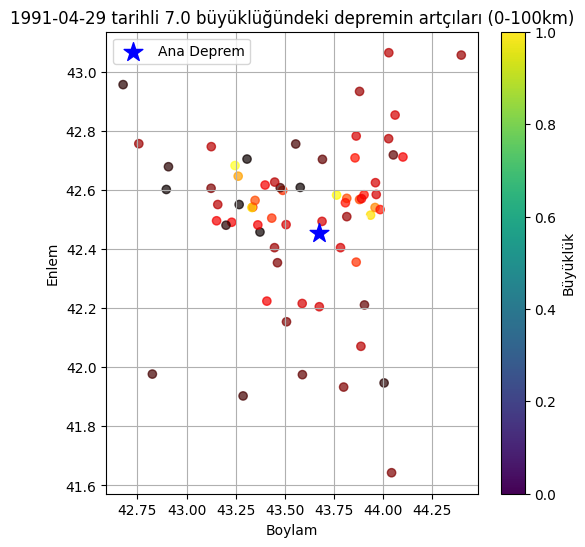

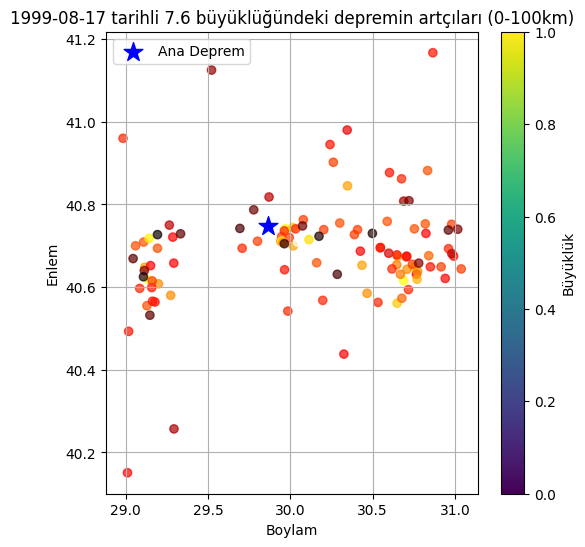

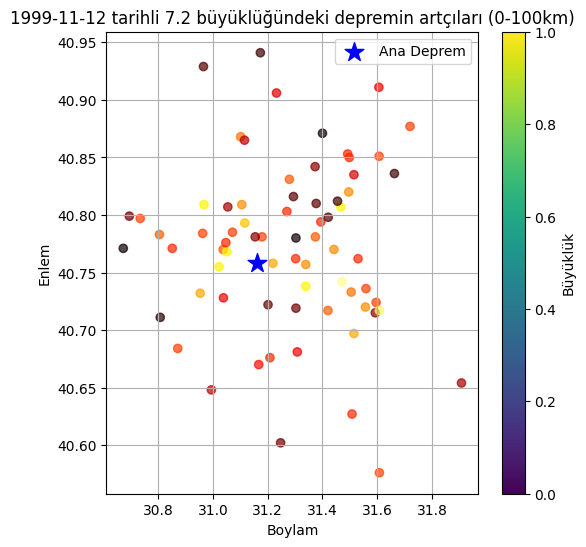

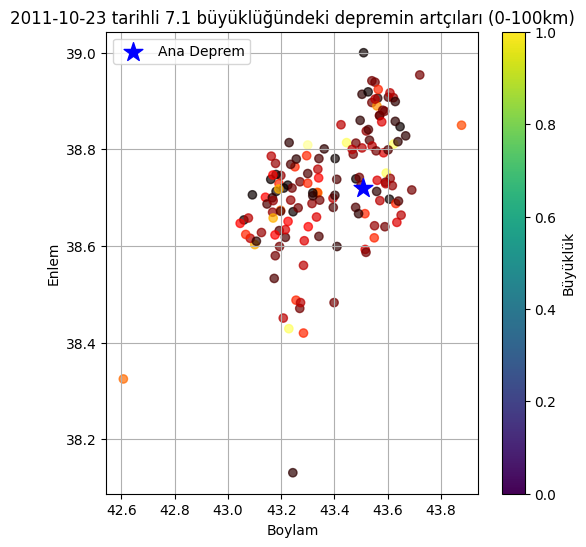

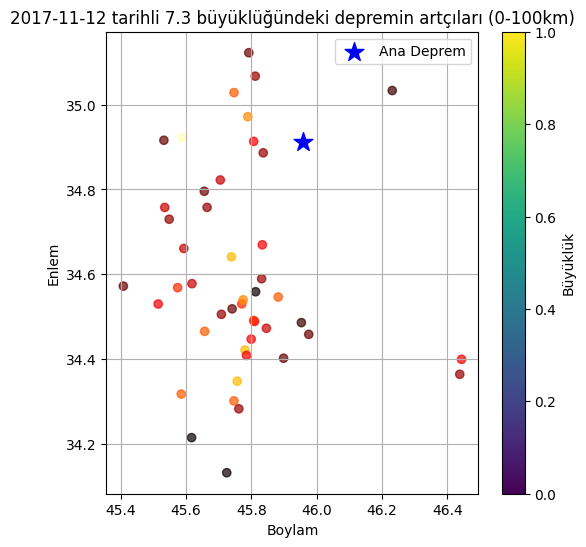

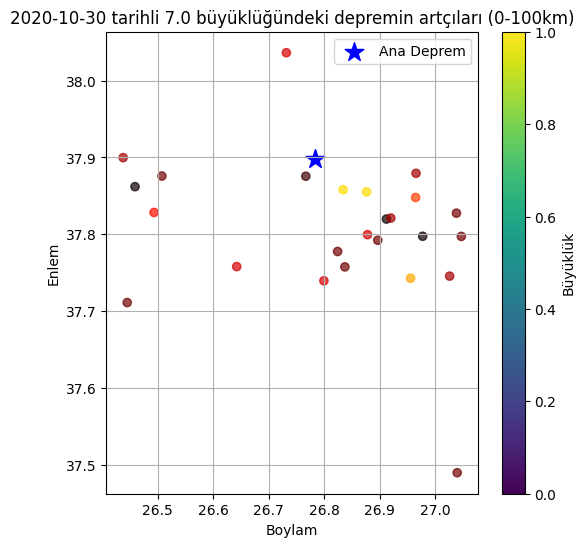

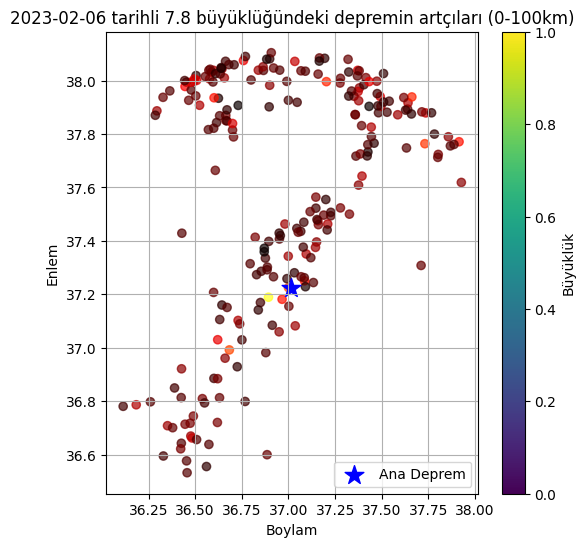

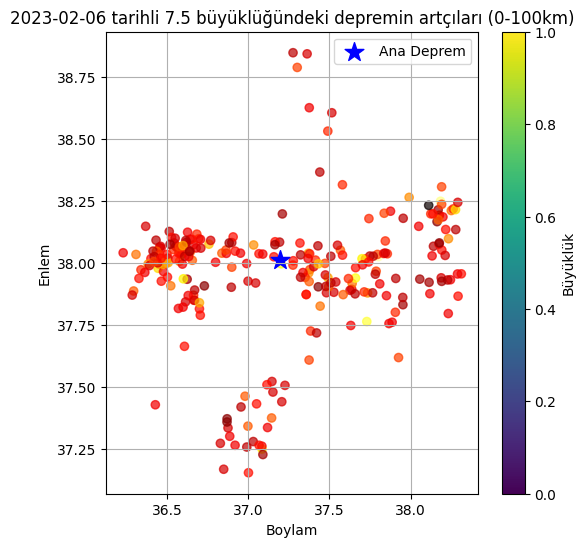

In [19]:
def plot_aftershock_map(df, threshold=5.5, days_after=30):
    import matplotlib.pyplot as plt

    main_quakes = df[df['mag'] >= threshold]

    for i, main_quake in main_quakes.iterrows():
        center_time = main_quake['time']
        lat, lon = main_quake['latitude'], main_quake['longitude']

        time_window = (df['time'] > center_time) & (df['time'] <= center_time + timedelta(days=days_after))
        distance_filter = df.apply(lambda row: haversine((lat, lon), (row['latitude'], row['longitude'])) < 100, axis=1)
        aftershocks = df[time_window & distance_filter]

        plt.figure(figsize=(6, 6))
        plt.scatter(aftershocks['longitude'], aftershocks['latitude'], c=aftershocks['mag'], cmap='hot', alpha=0.7)
        plt.scatter(lon, lat, color='blue', marker='*', s=200, label='Ana Deprem')
        plt.title(f"{center_time.date()} tarihli {main_quake['mag']} büyüklüğündeki depremin artçıları (0-100km)")
        plt.colorbar(label="Büyüklük")
        plt.xlabel("Boylam")
        plt.ylabel("Enlem")
        plt.legend()
        plt.grid(True)
        plt.show()
        
plot_aftershock_map(df_earthquakes, threshold=7.0, days_after=30)

C:\Users\Serhat\AppData\Local\Temp\ipykernel_1620\318035245.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aftershocks['days_after'] = (aftershocks['time'] - center_time).dt.days + 1  # +1 to avoid log(0)


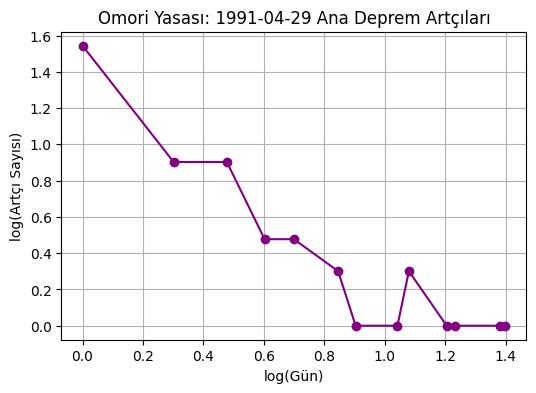

C:\Users\Serhat\AppData\Local\Temp\ipykernel_1620\318035245.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aftershocks['days_after'] = (aftershocks['time'] - center_time).dt.days + 1  # +1 to avoid log(0)


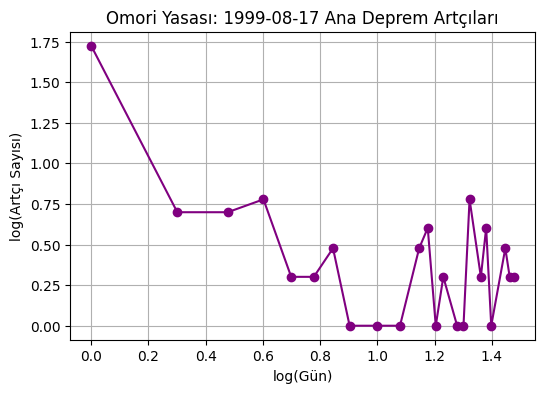

C:\Users\Serhat\AppData\Local\Temp\ipykernel_1620\318035245.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aftershocks['days_after'] = (aftershocks['time'] - center_time).dt.days + 1  # +1 to avoid log(0)


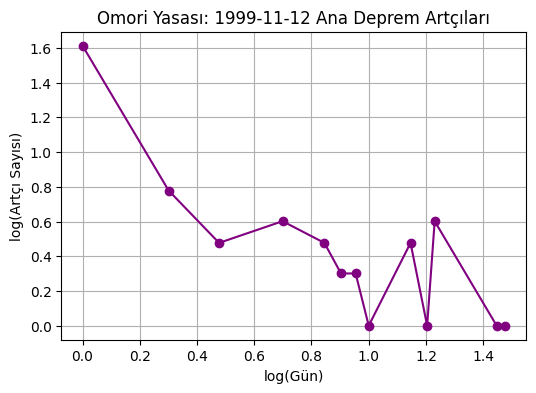

C:\Users\Serhat\AppData\Local\Temp\ipykernel_1620\318035245.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aftershocks['days_after'] = (aftershocks['time'] - center_time).dt.days + 1  # +1 to avoid log(0)


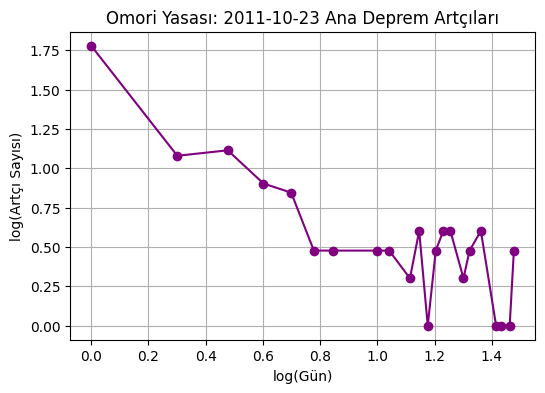

C:\Users\Serhat\AppData\Local\Temp\ipykernel_1620\318035245.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aftershocks['days_after'] = (aftershocks['time'] - center_time).dt.days + 1  # +1 to avoid log(0)


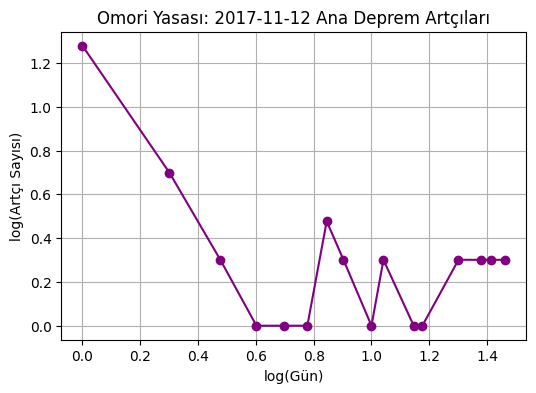

C:\Users\Serhat\AppData\Local\Temp\ipykernel_1620\318035245.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aftershocks['days_after'] = (aftershocks['time'] - center_time).dt.days + 1  # +1 to avoid log(0)


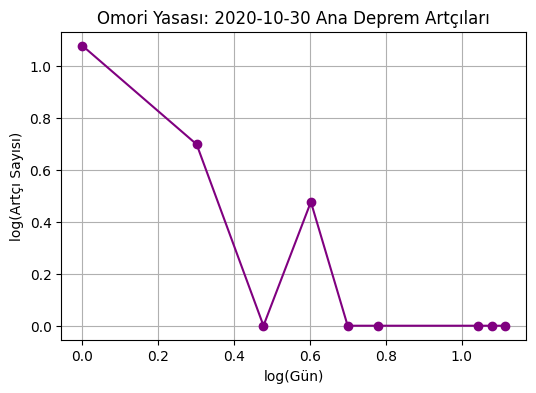

C:\Users\Serhat\AppData\Local\Temp\ipykernel_1620\318035245.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aftershocks['days_after'] = (aftershocks['time'] - center_time).dt.days + 1  # +1 to avoid log(0)


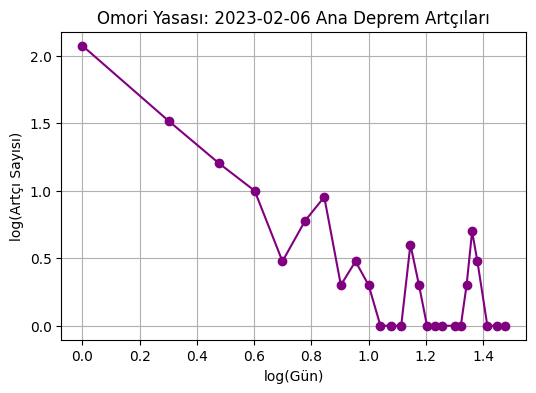

C:\Users\Serhat\AppData\Local\Temp\ipykernel_1620\318035245.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aftershocks['days_after'] = (aftershocks['time'] - center_time).dt.days + 1  # +1 to avoid log(0)


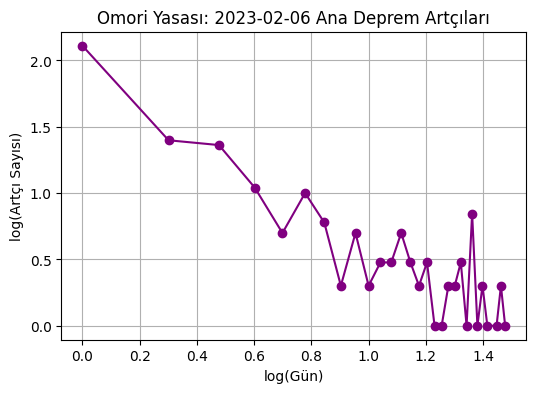

In [22]:
def plot_omori_law(df, threshold=5.5, days_after=30):
    main_quakes = df[df['mag'] >= threshold]

    for i, main_quake in main_quakes.iterrows():
        center_time = main_quake['time']
        lat, lon = main_quake['latitude'], main_quake['longitude']

        time_window = (df['time'] > center_time) & (df['time'] <= center_time + timedelta(days=days_after))
        distance_filter = df.apply(lambda row: haversine((lat, lon), (row['latitude'], row['longitude'])) < 100, axis=1)
        aftershocks = df[time_window & distance_filter]

        aftershocks['days_after'] = (aftershocks['time'] - center_time).dt.days + 1  # +1 to avoid log(0)
        daily_counts = aftershocks['days_after'].value_counts().sort_index()

        plt.figure(figsize=(6, 4))
        plt.plot(np.log10(daily_counts.index), np.log10(daily_counts.values), 'o-', color='purple')
        plt.title(f"Omori Yasası: {center_time.date()} Ana Deprem Artçıları")
        plt.xlabel("log(Gün)")
        plt.ylabel("log(Artçı Sayısı)")
        plt.grid(True)
        plt.show()
plot_omori_law(df_earthquakes, threshold=7.0, days_after=30)

C:\Users\Serhat\AppData\Local\Temp\ipykernel_1620\3357062000.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aftershocks['days_after'] = (aftershocks['time'] - center_time).dt.days


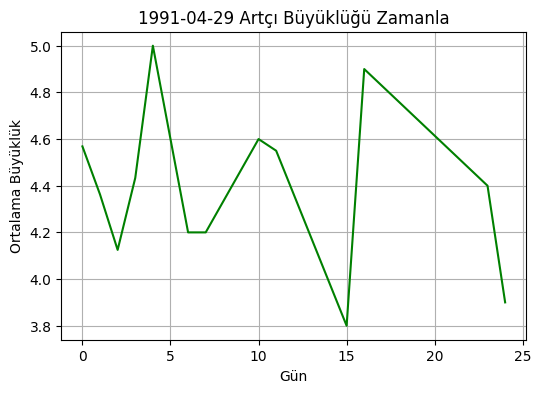

C:\Users\Serhat\AppData\Local\Temp\ipykernel_1620\3357062000.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aftershocks['days_after'] = (aftershocks['time'] - center_time).dt.days


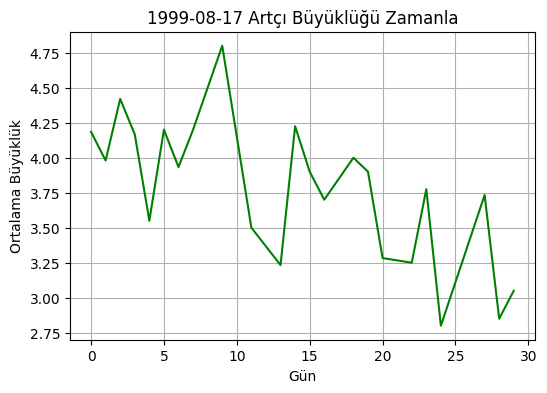

C:\Users\Serhat\AppData\Local\Temp\ipykernel_1620\3357062000.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aftershocks['days_after'] = (aftershocks['time'] - center_time).dt.days


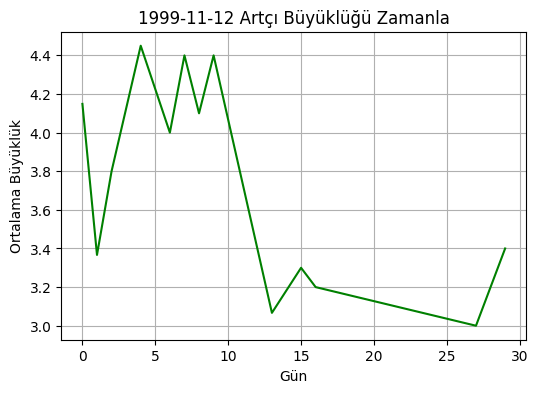

C:\Users\Serhat\AppData\Local\Temp\ipykernel_1620\3357062000.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aftershocks['days_after'] = (aftershocks['time'] - center_time).dt.days


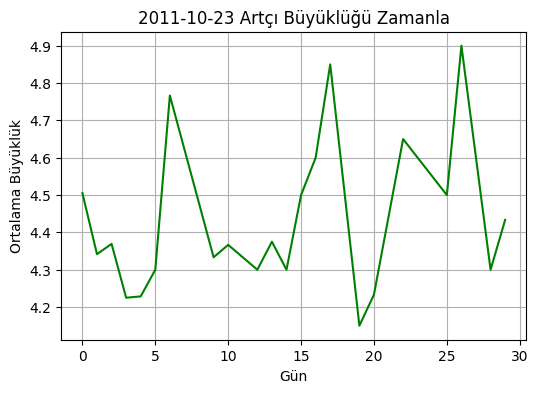

C:\Users\Serhat\AppData\Local\Temp\ipykernel_1620\3357062000.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aftershocks['days_after'] = (aftershocks['time'] - center_time).dt.days


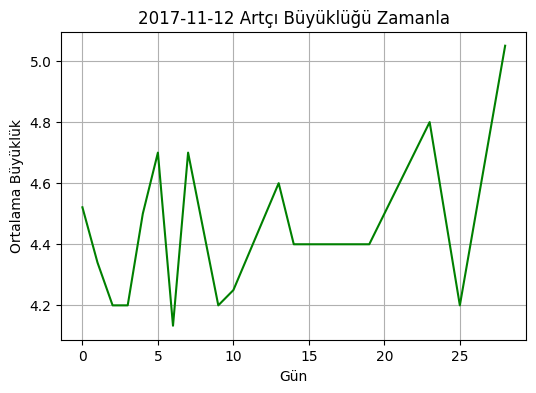

C:\Users\Serhat\AppData\Local\Temp\ipykernel_1620\3357062000.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aftershocks['days_after'] = (aftershocks['time'] - center_time).dt.days


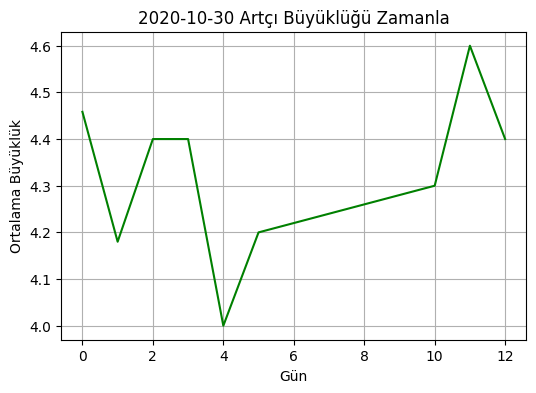

C:\Users\Serhat\AppData\Local\Temp\ipykernel_1620\3357062000.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aftershocks['days_after'] = (aftershocks['time'] - center_time).dt.days


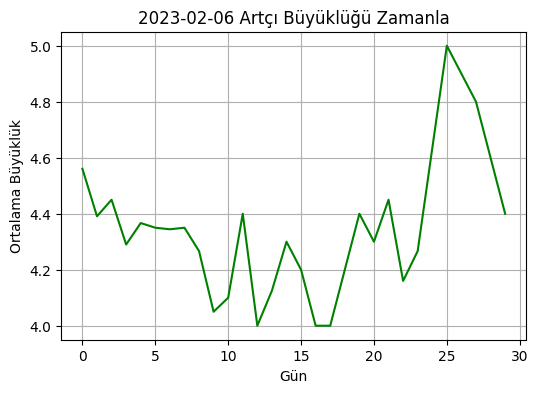

C:\Users\Serhat\AppData\Local\Temp\ipykernel_1620\3357062000.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aftershocks['days_after'] = (aftershocks['time'] - center_time).dt.days


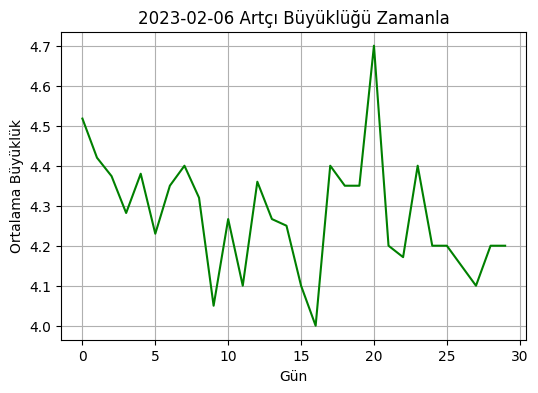

In [24]:
def plot_aftershock_magnitude_trend(df, threshold=5.5, days_after=30):
    main_quakes = df[df['mag'] >= threshold]

    for i, main_quake in main_quakes.iterrows():
        center_time = main_quake['time']
        lat, lon = main_quake['latitude'], main_quake['longitude']

        time_window = (df['time'] > center_time) & (df['time'] <= center_time + timedelta(days=days_after))
        distance_filter = df.apply(lambda row: haversine((lat, lon), (row['latitude'], row['longitude'])) < 100, axis=1)
        aftershocks = df[time_window & distance_filter]

        aftershocks['days_after'] = (aftershocks['time'] - center_time).dt.days
        avg_mag_per_day = aftershocks.groupby('days_after')['mag'].mean()

        plt.figure(figsize=(6, 4))
        plt.plot(avg_mag_per_day.index, avg_mag_per_day.values, color='green')
        plt.title(f"{center_time.date()} Artçı Büyüklüğü Zamanla")
        plt.xlabel("Gün")
        plt.ylabel("Ortalama Büyüklük")
        plt.grid(True)
        plt.show()
plot_aftershock_magnitude_trend(df_earthquakes, threshold=7.0, days_after=30)